In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
rawData = pd.read_csv('data/train.csv')
del rawData["ID"]

In [4]:
rawData.shape

(76020, 370)

In [5]:
rawData.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
rawData.dtypes.value_counts()

int64      259
float64    111
dtype: int64

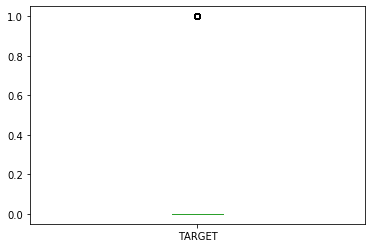

In [7]:
rawData['TARGET'].plot.box()

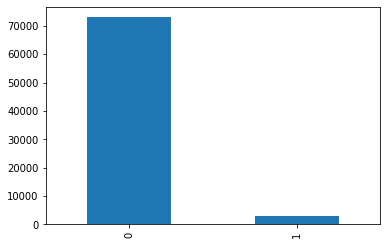

In [8]:
rawData['TARGET'].value_counts().plot.bar()

In [9]:
# Dataset também não possui valores missing
pd.isna(rawData).sum().sum()

0

In [10]:
x = rawData.iloc[:,0:369]
y = rawData.iloc[:,369]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x)

pca = PCA(n_components=50)
fit = pca.fit(rescaledX)

print("Variancia: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variancia: [0.27154664 0.19262329 0.10112909 0.08260766 0.06761694 0.06481698
 0.03714281 0.02848089 0.01658167 0.0143028  0.01349128 0.01285434
 0.00927508 0.00682029 0.0062179  0.00601429 0.0055771  0.00499381
 0.00449094 0.00424287 0.00383393 0.00370891 0.00347502 0.00322269
 0.00288312 0.00267081 0.00224641 0.00190571 0.00170224 0.00142653
 0.00139829 0.0012892  0.0011904  0.00111896 0.00096282 0.00088276
 0.0008343  0.00080598 0.00070754 0.00064991 0.00057622 0.00056132
 0.00054189 0.00052347 0.00049234 0.00043515 0.00042374 0.00038681
 0.00038128 0.00035418]
[[ 1.73716195e-03  1.68017938e-02  4.44335017e-04 ...  9.31006583e-05
   1.09829483e-04 -3.03090629e-04]
 [-4.63170932e-04  3.44300011e-02  2.83013338e-04 ...  6.73298145e-05
   9.34273559e-05  1.90451384e-04]
 [ 6.45499373e-04  8.45067599e-02  5.17153279e-04 ...  6.43763835e-05
   9.48995704e-05  3.88831412e-04]
 ...
 [-1.38127704e-02 -8.72407905e-03 -3.69275067e-03 ...  1.86954704e-04
  -3.46409918e-04  1.59186580e-03]
 [ 5

In [11]:
dataPCA = pd.DataFrame(pca.transform(x))
dataPCA["TARGET"] = rawData["TARGET"]
dataPCA

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,TARGET
0,-54.241152,17.363941,-0.713404,-17.187300,-12.174608,-20.002993,44.771573,68.341974,-12.539118,29.895752,...,52.525315,2.893075,33.862874,-38.714086,5.238157,10.659861,61.863651,92.935677,184.820216,0
1,-6.442188,5.243941,123.012211,23.029572,-92.645361,-7.081628,5.856706,24.615936,-13.679734,24.833486,...,22.882528,36.988991,55.203955,-71.582336,6.745928,15.704105,112.170416,139.223032,304.372076,0
2,-59.744138,21.154408,9.644116,-16.595866,-13.076737,-27.341997,38.805839,74.550209,-21.259353,49.729006,...,90.878094,5.477524,57.981758,-67.096444,9.149288,18.253985,108.022033,160.328161,321.378861,0
3,-5.084179,27.994929,31.391218,0.916965,1.279753,-20.761350,-28.450095,27.806083,-3.149788,59.116123,...,107.619742,-0.993020,46.930246,-144.354489,-25.794227,39.387453,113.953946,433.319858,376.320152,0
4,1452.508977,467.549300,9117.243300,2271.374968,10719.721606,-7047.030109,5254.686660,-111.355347,-606.515640,662.876930,...,13011.984072,7990.191519,16741.180466,-17043.111937,15101.707964,-729.709086,142544.740460,60484.762720,253375.547999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,-60.404636,22.361546,9.845197,-16.730255,-13.048284,-26.762413,38.608991,72.368320,-19.339117,46.378705,...,80.843644,4.589700,51.802057,-60.266784,8.159018,16.521032,96.222975,144.255599,286.730939,0
76016,389.433201,133.845467,3044.289662,737.260622,3703.819503,-2351.435046,2358.294521,-844.675839,-821.583536,503.347318,...,9882.828216,-343.875393,5076.432496,-3938.962446,3770.830414,482.816434,51035.687982,20879.714457,82193.205595,0
76017,-62.174040,22.704714,12.373011,-16.642246,-13.293134,-29.200799,36.889348,75.677990,-23.495382,54.502665,...,99.970599,6.124019,63.693293,-73.915841,10.034196,20.011658,118.735363,176.170221,353.131629,0
76018,-64.783884,24.470949,16.523240,-17.025592,-13.676286,-32.011745,34.329202,77.558720,-26.573653,61.817213,...,113.793952,7.100559,72.440855,-84.249671,11.386961,22.735077,135.041708,200.461021,401.446066,0


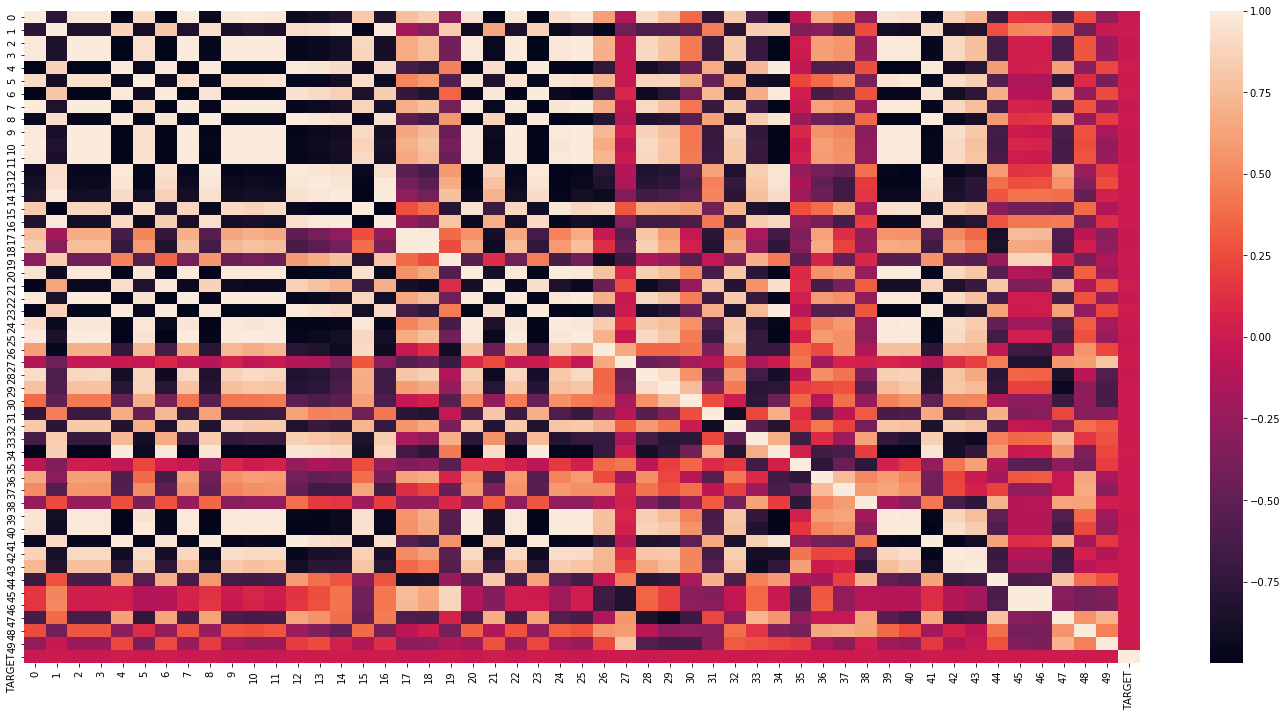

In [12]:
corr = dataPCA.corr()

f,ax = plt.subplots(figsize = (25,12))

sns.heatmap(corr)

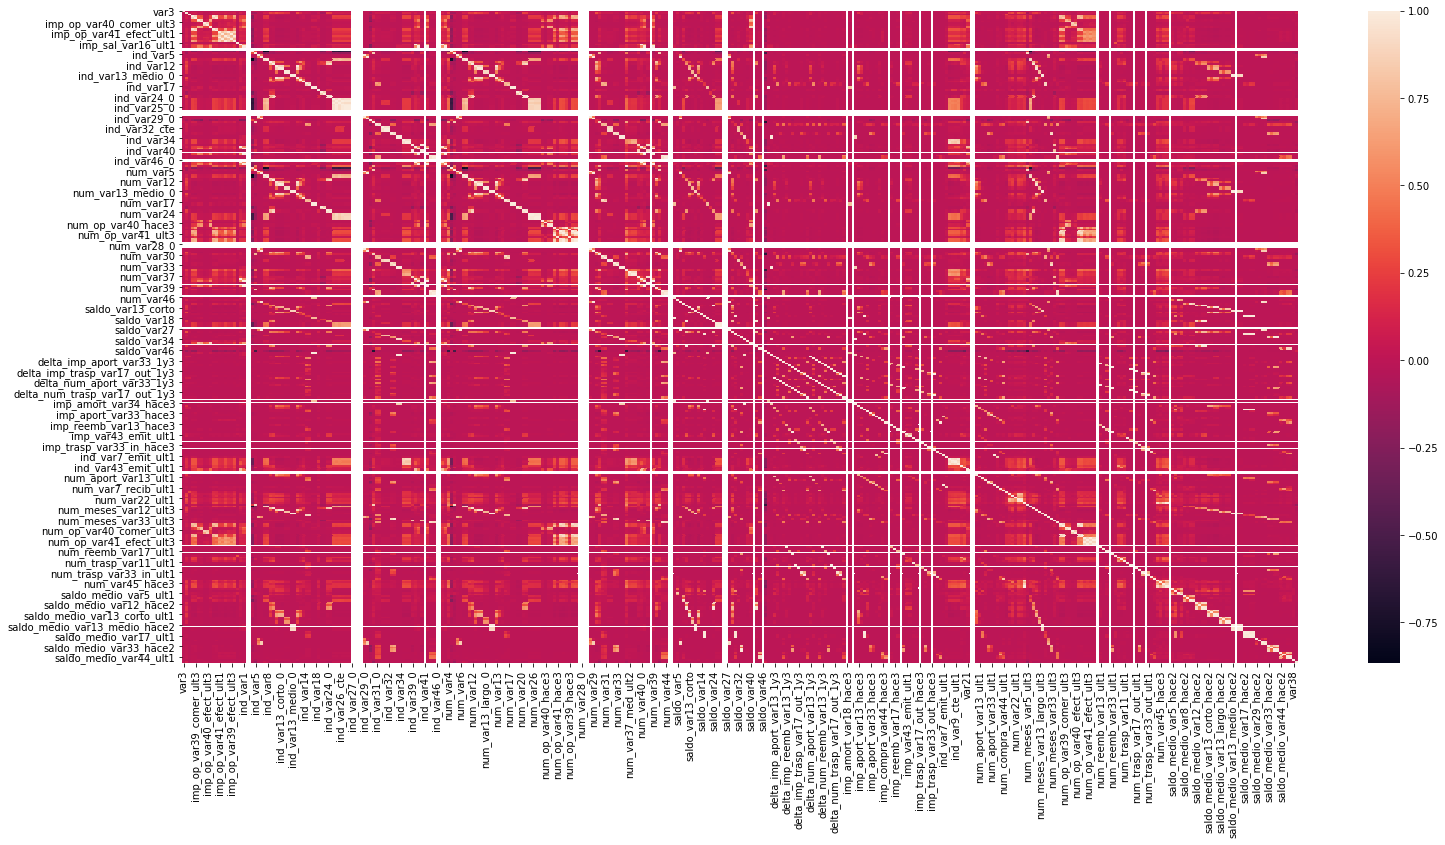

In [13]:
corr = rawData.corr()

f,ax = plt.subplots(figsize = (25,12))

sns.heatmap(corr)

In [14]:
x = rawData.iloc[:,0:369]
y = rawData.iloc[:,369]

In [15]:
model = LogisticRegression(solver = 'lbfgs',max_iter=1500)

kfold = KFold(n_splits=10, shuffle=True,random_state=7)
resultado = cross_val_score(model, x,y,cv = kfold, scoring="roc_auc")

print("Acurácia %.3f" % (resultado.mean()*100))

Acurácia 60.182


In [16]:
# utilizando random forest
# Definindo os valores para o número de folds
num_folds = 2
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 3

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
resultado = cross_val_score(modelo, x, y, cv = kfold,scoring="roc_auc")

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 74.600


In [17]:
# Definindo os valores para o número de folds
num_folds = 4
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, x, y, cv = kfold, scoring="roc_auc")

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 82.433


In [18]:
# Definindo os valores para o número de folds
num_folds = 4
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)

# Criando o modelo
modelo = XGBClassifier(n_estimators = num_trees, random_state = seed, use_label_encoder = False)

# Cross Validation
resultado = cross_val_score(modelo, x, y, cv = kfold, scoring="roc_auc")

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

[14:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# após esse ponto percebo que o algoritmo que melhor performou utilizando a métrica de area under the curve for o XGbooxt.
# assim sendo irei tentar otimizar o modelo, fazendo escala nos valores e utilizando outras técnicas como o smote para tentar melhorar a performance. Meu objetivo é conseguir uma boa performance utilizando como métricas: Confusion matrix, recall

In [19]:
# Comecarei definindo uma função que irá realizar a escala dos dados
def datasetScaler(dataset):
    datasetScaled = dataset.copy()
    numColAjustar = dataset.shape[1]
    colunasMaiores1 = [col for col in dataset.iloc[:,0:numColAjustar].columns if dataset[col].max() >1]
    scaler = MinMaxScaler(feature_range = (0,1))

    toScale = dataset[colunasMaiores1]
    scaled = pd.DataFrame(scaler.fit_transform(toScale), columns=colunasMaiores1)


    for col in colunasMaiores1:
        datasetScaled[col] = scaled[col]
    return datasetScaled

In [20]:
dataSetEscalado = datasetScaler(rawData)

In [21]:
x = dataSetEscalado.iloc[:,0:369]
y = dataSetEscalado.iloc[:,369]

num_folds = 4
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)

# Criando o modelo
modelo = XGBClassifier(n_estimators = num_trees, random_state = seed,use_label_encoder = False)

# Cross Validation
resultado = cross_val_score(modelo, x, y, cv = kfold, scoring="roc_auc")

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

[14:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Após tentar com o dataset escalado percebi que não houve nenhuma influência na acurácia do modelo, assim sendo posso tanto continuar com o dataset escalado quanto com o dataset normal, irei continuar com o dataset escalado. Assim sendo irei realizar alguns ajustes afim de verificar como fica a performance do modelo.
# o dataset fornecido é extremamente desbalanceado, isso implica que apenas a métrica de acurácia não é suficiente para medir quão bem o modelo está performando. Dessa forma tentarei avaliar o modelo de outras maneiras

In [22]:
# Construindo uma função que : divide o dataset em treino e teste, além de já protar as principais métricas que quero utilizar
# para avaliar o modelo
def testeDataset(dataset, model):

    numColunas = dataset.shape[1]
    x = dataset.iloc[:,0:numColunas-1]
    y = dataset.iloc[:, numColunas-1]
    
    x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=7)
    
    model.fit(x_treino,y_treino)
    predicoes = model.predict(x_teste)
    accuracy = accuracy_score(y_teste, predicoes)
    recall = recall_score(y_teste, predicoes)
    precision = precision_score(y_teste, predicoes)
    print("Acurácia = %.2f, \nRecall = %.2f \nPrecision = %.2f" % (accuracy, recall,precision))
    cm = confusion_matrix(y_teste, predicoes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot = True, cmap = "Blues")

[14:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia = 0.96, 
Recall = 0.01 
Precision = 0.28


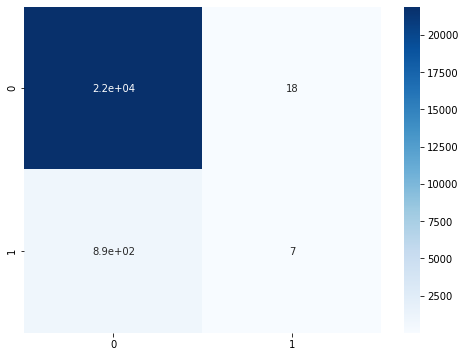

In [23]:
num_trees = 100
random_state = 7

modelo = XGBClassifier(n_estimators = num_trees, random_state = seed, use_label_encoder = False)

testeDataset(dataSetEscalado, modelo)

In [24]:
sm = SMOTE(random_state = 7)
x = dataSetEscalado.iloc[:,0:369]
y = dataSetEscalado.iloc[:,369]

xSmote, ySmote = sm.fit_resample(x,y)

datasetSmotedScaled = pd.DataFrame(xSmote)
datasetSmotedScaled["TARGET"] = ySmote

[14:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia = 0.92, 
Recall = 0.94 
Precision = 0.91


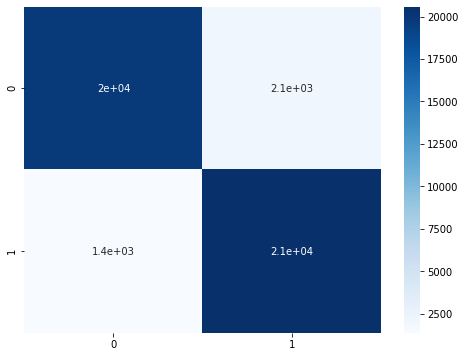

In [25]:
num_trees = 100
random_state = 7

modelo = XGBClassifier(n_estimators = num_trees, random_state = seed, use_label_encoder = False)

testeDataset(datasetSmotedScaled, modelo)

In [26]:
#Aqui encontrei uma boa relação entre : Acurácia, precision e recall, embora ainda não esteja tão boa assim o número de 
#Verdadeiros positivos/negativos está muito melhor que o número de falsos positivos/negativos
#Tentarei então otimizar o algoritmo que escolhi (XGBoost) afim de melhorar isso

In [27]:
x = datasetSmotedScaled.iloc[:,0:369]
y = datasetSmotedScaled.iloc[:,369]

In [30]:
%%time

param_test1 = {
 'max_depth':[3,4,5],
 'min_child_weight':[1,2]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',  scale_pos_weight=1, seed=27, use_label_encoder = False), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x, y)

# Print do resultado
print("Acurácia: %.3f" % (gsearch1.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", gsearch1.best_estimator_)

[15:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia: 95.694
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              use_label_encoder=Fals

In [31]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 2}

[15:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia = 0.91, 
Recall = 0.92 
Precision = 0.90
Wall time: 45.3 s


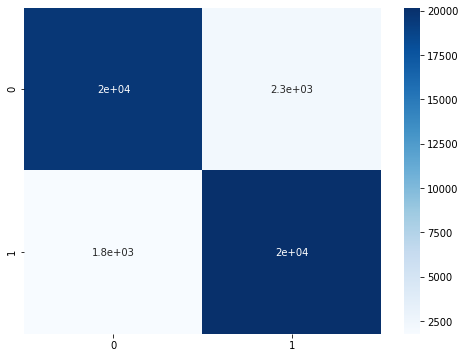

In [32]:
%%time

num_trees = 100
random_state = 7

modelo = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=random_state, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

testeDataset(datasetSmotedScaled, modelo)

[15:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


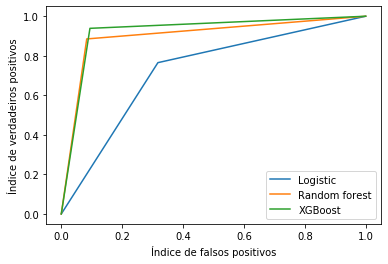

In [33]:
x = datasetSmotedScaled.iloc[:,0:369]
y = datasetSmotedScaled.iloc[:,369]

num_trees = 100
random_state = 7

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=random_state)

#Logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1200)
model.fit(x_treino, y_treino)

predLogistic = model.predict(x_teste)
#Random Forest
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
model.fit(x_treino, y_treino)

predRandomForest = model.predict(x_teste)

#XGB Classifier
model = XGBClassifier(learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, n_estimators=500, random_state=random_state, reg_alpha=0, 
              reg_lambda=1, scale_pos_weight=1, seed=random_state, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

model.fit(x_treino, y_treino)

predXGBoost = model.predict(x_teste)

lr_fpr, lr_tpr, _ = roc_curve(y_teste, predLogistic)
rf_fpr, rf_tpr, _ = roc_curve(y_teste, predRandomForest)
xgb_fpr, xgb_tpr, _ = roc_curve(y_teste, predXGBoost)

plt.plot(lr_fpr, lr_tpr, linestyle = "solid", label = "Logistic")
plt.plot(rf_fpr, rf_tpr, linestyle = "solid", label = "Random forest")
plt.plot(xgb_fpr, xgb_tpr, linestyle = "solid", label = "XGBoost")

plt.xlabel('Índice de falsos positivos')
plt.ylabel('Índice de verdadeiros positivos')

plt.legend()

plt.show()

In [ ]:
#Conclusão: após uma análise exploratória facilitada pois o dataset já veio bem tratado pelo pessoal do Santander iniciei a fase
#de análise preditiva com os algoritmos : logistic regression, random forest, adaboost, e XGBoost. o melhor modelo foi o
#XGBoost que foi escolhido utilizado a métrica de Area Under curve justamente por ter sido a métrica prevista pelo pessoal do 
#Kaggle, após isso também iniciei um processo de tunning dos hiperparâmetros do algoritmo ao qual terminou com um otimização razoável
#Ao final obtive um modelo que apresentou uma métrica razoável em precision/accuracy/recall
#o que pode ser verificado pela confusion matrix
# também plotei as curvas ROC para alguns dos algoritmos utilizados visualizando que o modelo escolhido realmente faz um trabalho
# melhor que os outros na predição